# Ramey-Francis (2009)

## This notebook generates some of the key results of the Ramey-Francis (2009) AEJ paper, 'A Century of Work and Leisure'.


Reference: Christopher Carroll's lecture notes.__[RBC-Prescott](http://www.econ2.jhu.edu/people/ccarroll/public/LectureNotes/DSGEModels/RBC-Prescott.pdf)__.

The notebook using the Ramey-Francis data generates their key results. The main data file (main_data) is attached alongwith. The entire data package can be obtained from the following __[AEJ link](https://www.aeaweb.org/articles?id=10.1257/mac.1.2.189)__.


Over the past century in the U.S., wages have risen very substantially, but hours
worked (among the prime-age individuals) have not declined much if at all. (Ramey and Francis (2006)). What kind of
utility function implies that the budget share of a good (leisure) remains constant even
as the price of the good changes sharply? A Cobb-Douglas utility function. Hence the
assumption that utility is obtained from a Cobb-Douglas aggregate of consumption
and leisure is consistent with the lack of a strong trend in hours worked per worker.



In [1]:
# Import Basic functionalities
import sys
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import xlrd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import pylab
from copy  import deepcopy

In [2]:
#Import the notebook needed
# List the columns from the excel workbook
df = pd.read_excel('C:\Users\AKG\Desktop\Main_Data.xls', sheetname='Main_data') #Place here the location of your data file
print("Column headings:")
print(df.columns)

Column headings:
Index([u'year', u'population', u'Population 10+', u'Population 14+',
       u'Population 65+', u'fraction 18-64', u'fraction total',
       u'fraction 65+', u'Total hours (Kendrick 61)',
       u'Total hours (Kendrick 73)', u'CPS civilian hours', u'Spliced',
       u'Spliced.1', u'Annual hours per worker', u'employment-pop (14+)',
       u'employment-pop (10+)', u'employment-pop (14-64)',
       u'Avg. weekly hours (14+ males)', u'Avg. weekly hours (10-13)',
       u'Avg. weekly hours (14-17)', u'Avg. weekly hours (18-24)',
       u'Avg. weekly hours (25-54)', u'Avg. weekly hours (55-64)',
       u'Avg. weekly hours (65+)', u'Avg. weekly hours',
       u'Avg. weekly hours.1', u'Avg. weekly hours.2', u'Avg. weekly hours.3',
       u'Avg. weekly hours.4', u'Avg. weekly hours.5', u'Avg. weekly hours.6',
       u'Avg. weekly hours (14+)', u'Avg. weekly hours.7',
       u'Avg. weekly hours.8', u'Avg. weekly hours.9', u'Avg. weekly hours.10',
       u'Avg. weekly hours.11', 

C:\Users\AKG\Anaconda2\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [3]:
# Import the columns needed for graphs
listyear=df['year'].drop([0,1,2,3]) #To remove NaN values
listannhrsperwrk=df['Annual hours per worker'].drop([0,1,2,3])
listemppop14=df['employment-pop (10+)'].drop([0,1,2,3])
listemppop10=df['employment-pop (14+)'].drop([0,1,2,3])
listemppop14_64=df['employment-pop (14-64)'].drop([0,1,2,3])

In [4]:
# Employment Hours distributed according to demographic groups
Avghrsperwrk=pd.concat([listyear,listannhrsperwrk],axis=1)
Emp10=pd.concat([listyear,listemppop10],axis=1)
Emp14=pd.concat([listyear,listemppop14],axis=1)
Emp14_64=pd.concat([listyear,listemppop14_64],axis=1)
Emptot=pd.concat([listyear,listemppop14_64,listemppop10,listemppop14],axis=1)
Emptot = Emptot.reset_index(drop=True) # Dislays Employment-Population ratio across the three demographic groups yearwise
Emptot

,year,employment-pop (14-64),employment-pop (14+),employment-pop (10+)
0,1900.0,0.563806,0.529887,0.470336
1,1901.0,0.574219,0.53962,0.479577
2,1902.0,0.585273,0.549925,0.48937
3,1903.0,0.589753,0.554053,0.493676
4,1904.0,0.574844,0.540005,0.481786
5,1905.0,0.587375,0.551675,0.492843
6,1906.0,0.596971,0.560592,0.501433
7,1907.0,0.598116,0.56156,0.502882
8,1908.0,0.571631,0.536596,0.481062
9,1909.0,0.587436,0.551329,0.494731


In [5]:
# Leisure Hours distributed according to demographic groups
leisure14_17=df['Avg. weekly hours leisure (14-17)'].drop([0,1,2,3]) #To remove NaN values
leisure18_24=df['Avg. weekly hours leisure (18-24)'].drop([0,1,2,3])
leisure25_54=df['Avg. weekly hours leisure (25-54)'].drop([0,1,2,3])
leisure55_64=df['Avg. weekly hours leisure (55-64)'].drop([0,1,2,3])
leisure65=df['Avg. weekly hours leisure (65+)'].drop([0,1,2,3])

In [6]:
# Leisure Hours distributed according to demographic groups 
les14_17=pd.concat([listyear,leisure14_17],axis=1)
les18_24=pd.concat([listyear,leisure18_24],axis=1)
les25_54=pd.concat([listyear,leisure25_54],axis=1)
les55_64=pd.concat([listyear,leisure55_64],axis=1)
les65=pd.concat([listyear,leisure65],axis=1)
lestot=pd.concat([listyear,leisure14_17,leisure18_24,leisure25_54,leisure55_64,leisure65],axis=1)
lestot = lestot.reset_index(drop=True)
lestot

,year,Avg. weekly hours leisure (14-17),Avg. weekly hours leisure (18-24),Avg. weekly hours leisure (25-54),Avg. weekly hours leisure (55-64),Avg. weekly hours leisure (65+)
0,1900.0,49.0179,37.5543,32.4906,37.3559,47.9188
1,1901.0,48.3474,37.0649,31.8858,36.6864,47.4955
2,1902.0,47.8261,36.6182,31.3037,36.0135,47.1134
3,1903.0,47.6263,36.4738,31.0239,35.6224,46.9426
4,1904.0,48.2054,37.6046,32.1131,36.5084,47.6424
5,1905.0,47.5803,37.0125,31.3284,35.6612,47.155
6,1906.0,47.1177,36.7134,30.8636,35.0775,46.8593
7,1907.0,46.8856,36.6667,30.7476,34.8602,46.821
8,1908.0,48.0398,38.2946,32.5601,36.533,48.0301
9,1909.0,47.3611,37.5714,31.6805,35.6176,47.4711


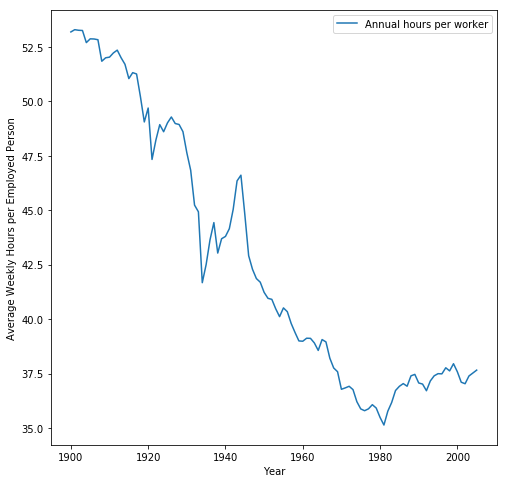

In [11]:
# Annual Hours Per Worker Figure 1 (Ramey-Francis)
Avghrsperwrk.plot(x='year', y='Annual hours per worker',figsize=(8,8))
plt.ylabel('Average Weekly Hours per Employed Person')
plt.xlabel('Year')
plt.show()

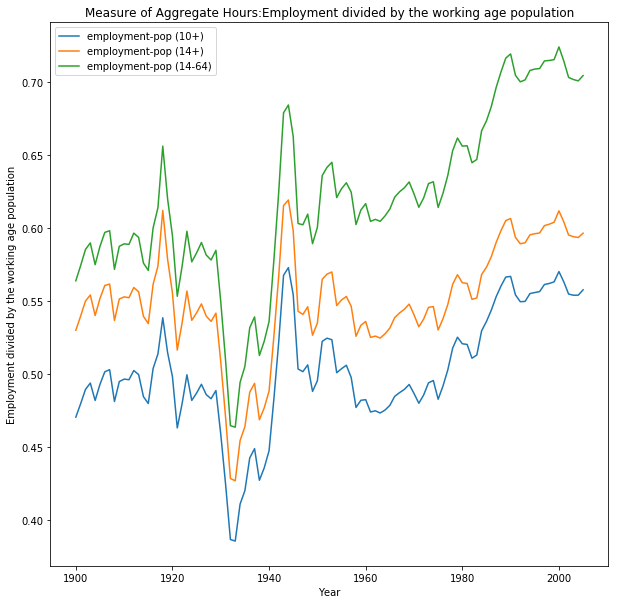

In [8]:
#Employment divided by the working age population (Figure 2)
Emptot.plot(x='year', y=['employment-pop (10+)','employment-pop (14+)','employment-pop (14-64)'],figsize=(10,10))
plt.ylabel('Employment divided by the working age population')
plt.xlabel('Year')
plt.title('Measure of Aggregate Hours:Employment divided by the working age population')
plt.show()


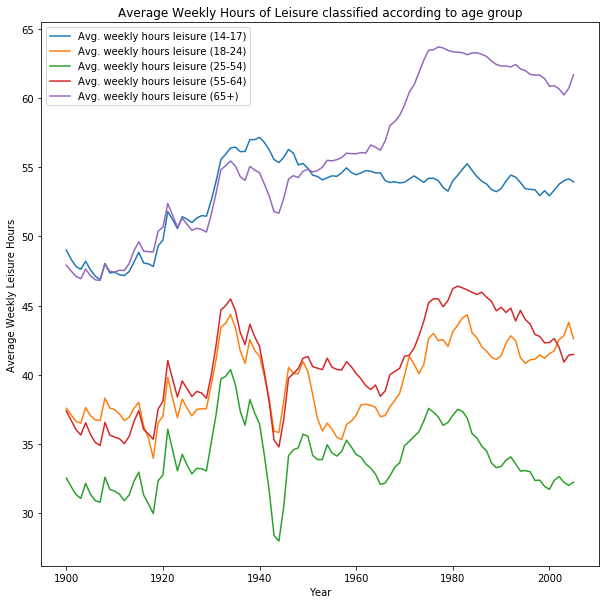

In [9]:
# Leisure Hours
lestot.plot(x='year',y=['Avg. weekly hours leisure (14-17)','Avg. weekly hours leisure (18-24)','Avg. weekly hours leisure (25-54)','Avg. weekly hours leisure (55-64)','Avg. weekly hours leisure (65+)'],figsize=(10,10))
plt.ylabel('Average Weekly Leisure Hours')
plt.xlabel('Year')
plt.title('Average Weekly Hours of Leisure classified according to age group')
plt.show()